In [1]:
import pandas as pd

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import decimal
decimal.getcontext().prec = 100
import imagesc as imagesc


In [3]:
from scipy.interpolate import interp1d
from scipy import interpolate 
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter

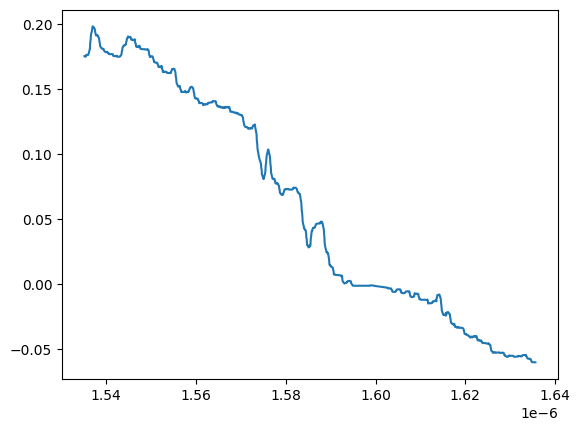

In [4]:
fac = 1e-9


lo = pd.read_csv('data/loss.csv')

lo_x = np.array(lo['x'])
lo_x *= fac
lo_y = np.array(lo['y'])

ri = pd.read_csv("data/ri.csv")
ri_x = np.array(ri['x'])
ri_x *= fac
ri_y = np.array(ri['y'])

per = pd.read_csv("data/permeability.csv")
per_x =  np.array(per['x'])
per_x *= fac
per_y =  np.array(per['y'])

plt.plot(ri_x,ri_y)




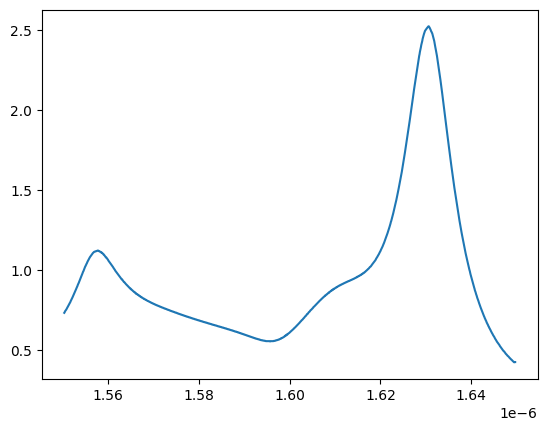

In [5]:
plt.plot(per_x,per_y)

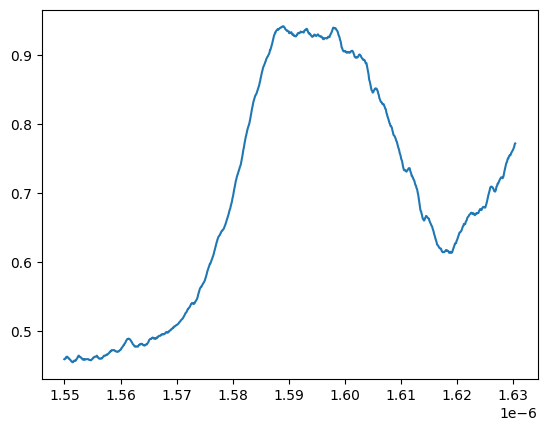

In [6]:
plt.plot(lo_x,lo_y)

In [7]:
pump_wl = 1.600e-6


In [8]:
signal_wl = 1.580e-6

In [9]:
c0 = 299792458

In [10]:
deltaOmega = 2*np.pi*c0*((pump_wl - signal_wl)/(signal_wl*pump_wl))

In [11]:
lambda_p_number = 1500

In [12]:
lambda_start = 1.562e-6

In [13]:
lambda_end = 1.59888e-6

In [14]:
L = 1.48e-5


In [15]:
n_SI = 3.4757

In [16]:
eps_zero = 8.854e-12

In [17]:
X3 = 2.45e-19

In [18]:
lambda_p = np.linspace(lambda_start,lambda_end, lambda_p_number)


In [19]:
lambda_s = np.divide((2*np.pi*c0*lambda_p),(2*np.pi*c0 + deltaOmega*lambda_p))


In [20]:
lambda_i = np.divide((2*np.pi*c0*lambda_p),(2*np.pi*c0 - deltaOmega*lambda_p))



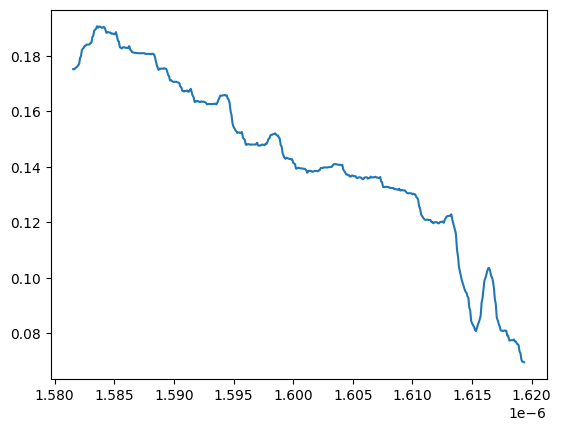

In [21]:
n_fun = interp1d(ri_x, ri_y,fill_value = "extrapolate")
n_p = n_fun(lambda_p)
n_s =n_fun(lambda_s)
 
n_i = n_fun(lambda_i)
plt.plot(lambda_i,n_s)



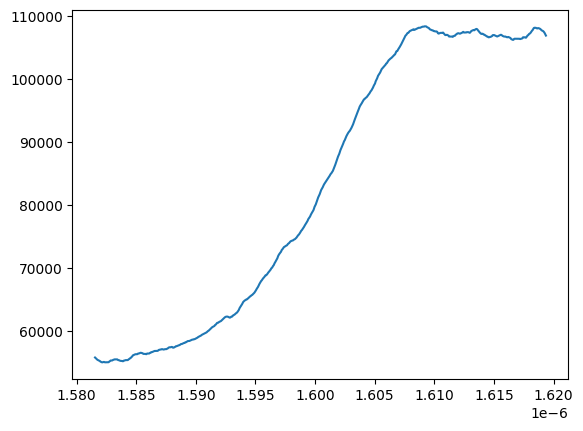

In [22]:
fac = 1e6*math.log(10)/20
loss_fun = interp1d(lo_x,lo_y,kind ="linear",fill_value = "extrapolate")
loss_p = loss_fun(lambda_p)*fac
loss_s = loss_fun(lambda_s)*fac
loss_i = loss_fun(lambda_i)*fac
plt.plot(lambda_i,loss_p)


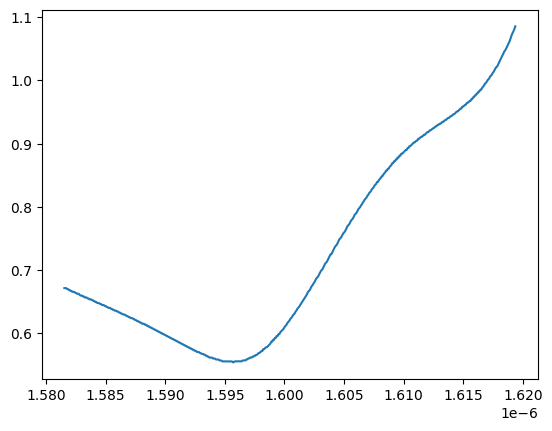

In [23]:
per_fun = interp1d(per_x,per_y,fill_value = "extrapolate")
per_i = per_fun(lambda_i)
# 
plt.plot(lambda_i,per_i)

In [24]:
k_p = 2*np.pi*np.divide(n_p,lambda_p)
k_s = 2*np.pi*np.divide(n_s,lambda_s)
k_i = 2*np.pi*np.divide(n_i,lambda_i)


In [25]:
delta_k_fw = 2*k_p -  k_s - k_i
delta_k_bw = 2*k_p -  k_s + k_i
delta_a = 2*loss_p + loss_s



In [26]:
w_i = np.divide(2*np.pi*c0,lambda_i)


In [27]:
Omega_fw = ((3.0/2)*X3) * np.divide(np.multiply(w_i,per_i),c0)

Omega_bw = ((3.0/2)*X3) * np.divide(np.multiply(w_i,np.multiply(np.exp(-(2*loss_p +loss_s)*L),per_i)),c0)


In [28]:
idler_amp_fw = (1j * np.multiply(Omega_fw,np.divide(np.exp((1j*delta_k_fw - delta_a)*L) - np.exp(-loss_i*L),1j*delta_k_fw + loss_i - delta_a)))


In [29]:
intensity_fw = (2*n_SI*eps_zero * c0 *abs(np.multiply(idler_amp_fw,idler_amp_fw)))

In [30]:
idler_amp_bw = 1j * np.multiply(Omega_bw,np.divide(np.exp((-1j*delta_k_bw + delta_a)*L) - np.exp(-loss_i*L),-1j*delta_k_bw + loss_i + delta_a))

In [31]:
intensity_bw = 2*n_SI*eps_zero * c0 *abs(np.multiply(idler_amp_bw,idler_amp_bw))

In [32]:
fac = 1e9
lambda_i *=fac


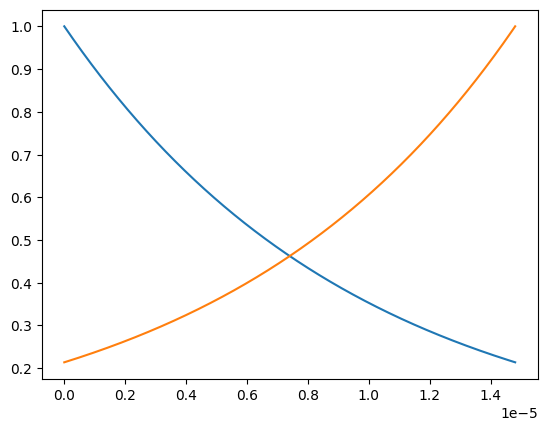

In [33]:
z = np.linspace(0,L,lambda_p_number)
a_p = loss_fun(pump_wl)
fac = 1e6*math.log(10)/20
a_p *=fac
a_p
q = np.exp(-a_p*z)
plt.plot(z,q)
q_1 = np.exp(-a_p*L)*np.exp(+a_p*z)
plt.plot(z,q_1)

(1580.0, 1620.0)

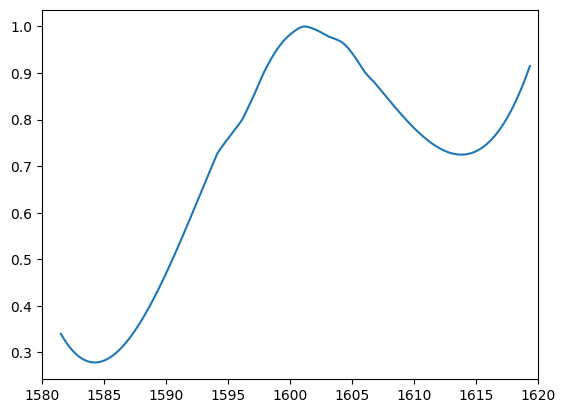

In [34]:
intensity_bw = savgol_filter(intensity_bw, 1000, 3)
intensity_bw =  np.divide(intensity_bw, np.max(intensity_bw))
plt.plot(lambda_i,intensity_bw)
plt.xlim(left=1580)  # adjust the right leaving left unchanged
plt.xlim(right=1620)  # adjust the left leaving right unchanged


(1580.0, 1620.0)

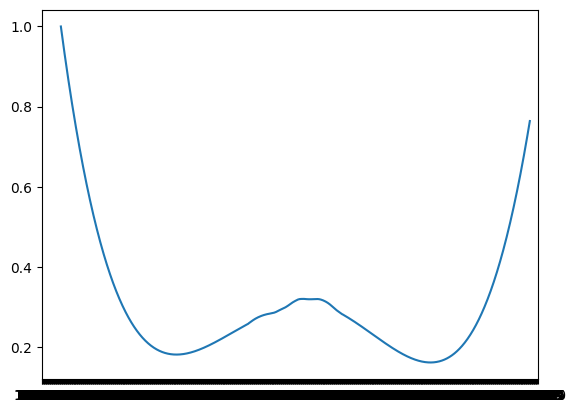

In [35]:
intensity_fw = savgol_filter(intensity_fw, 1200, 5)
intensity_fw =  np.divide(intensity_fw, np.max(intensity_fw))
lambda_l = np.linspace(1580,1620, int(lambda_p_number/2))
plt.plot(lambda_i,intensity_fw)
plt.xticks(lambda_l)
plt.xlim(left=1580)  # adjust the right leaving left unchanged
plt.xlim(right=1620)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
lambda_ = ri_x
lambda_min = 1.399e-06
lambda_max = 1.751e-06
number_of_points = 1001


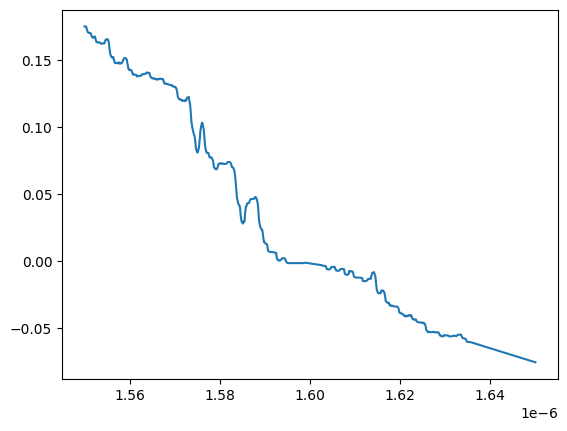

In [37]:

lambda_fine = np.linspace(np.amin(lambda_),np.amax(lambda_),number_of_points)
poly_order = 5
def extents(f):
    delta = f[1] - f[0]
    a = [f[0] - delta/2, f[-1] + delta/2]
    return a

n_poly = n_fun(lambda_fine)
lambda_p = np.transpose(np.linspace(1550,1650,number_of_points)) * 1e-09
lambda_p = lambda_p[:,np.newaxis]

lambda_s = np.linspace(1550,1650,number_of_points) * 1e-09
temp_p = 2.0 / lambda_p
temp_s = 1.0 / lambda_s
lambda_i = (2 / lambda_p - 1.0 / lambda_s) ** - 1
n_p = n_fun(lambda_p)
n_s = n_fun(lambda_s)
n_i = n_fun(lambda_i)
angledivisions = 4
anglesize = np.pi / (angledivisions / 2)
lambda_i.shape
x = lambda_s *1e9
y = lambda_p*1e9
x.max()
plt.plot(lambda_p,n_p)

/tmp/ipykernel_3844/2931980.py:20: RuntimeWarning: divide by zero encountered in divide
  L_coh = 2 / delta_k


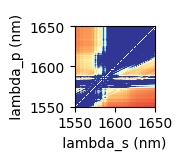

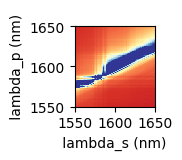

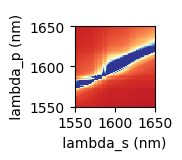

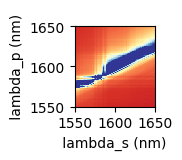

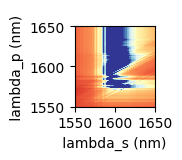

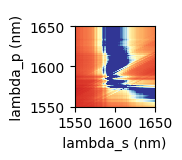

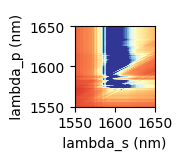

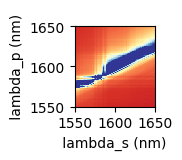

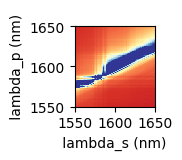

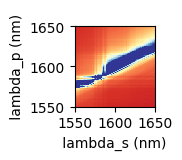

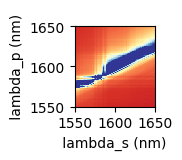

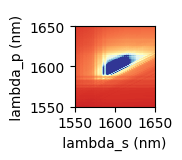

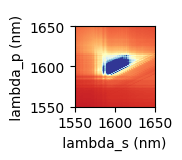

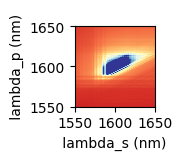

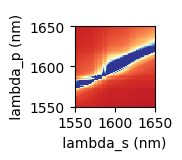

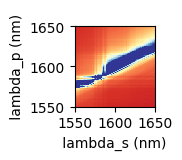

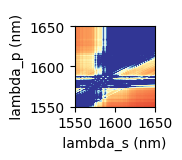

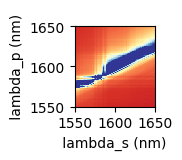

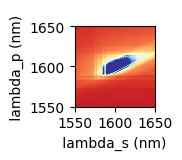

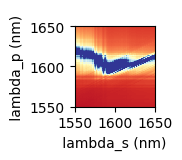

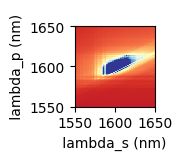

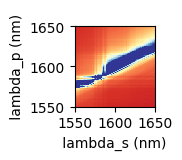

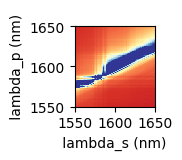

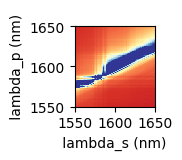

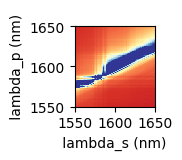

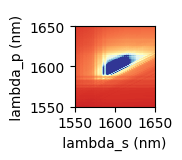

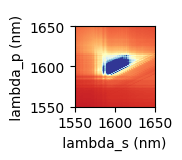

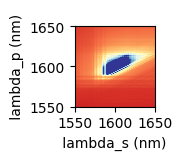

In [54]:
for k in np.arange(1,angledivisions+1).reshape(-1):
    
    
    phi_i = (k - 1) * anglesize
    for i in np.arange(1,angledivisions+1).reshape(-1):
        theta_s = (i - 1) * anglesize
        for j in np.arange(1,angledivisions+1).reshape(-1):
           
            if( i !=1 and j != 1):
                continue
            theta_i = (j - 1) * anglesize
           # print("phi_i",phi_i,"theta_s:",theta_s,"theta_i:",theta_i)
            kx = 2 * np.pi * (2 * n_p / lambda_p - n_s / lambda_s * np.cos(theta_s) - n_i / lambda_i * np.cos(theta_i) * np.cos(phi_i))
            ky = 2 * np.pi * (n_s / lambda_s * np.sin(theta_s) + n_i / lambda_i * np.sin(theta_i) * np.cos(phi_i))
            kz = 2 * np.pi * n_i / lambda_i * np.sin(phi_i)
            delta_k = np.sqrt(kx ** 2 + ky ** 2 + kz ** 2)
#             m = np.median(delta_k[delta_k> 0])
#             delta_k[delta_k == 0] = m
#             print(delta_k.dtype)
            L_coh = 2 / delta_k
            #print(L_coh.max(),L_coh.min())
            plt.subplot(angledivisions,angledivisions,angledivisions * (i - 1) + j)
            
            cm = plt.cm.get_cmap('RdYlBu')
            norm=plt.Normalize(0,15)
            a,b = extents(x)
            c,d = extents(y)
            extent=[1550,1650,1550,1650]
            a = plt.imshow(L_coh*10**6,cmap = cm,norm =norm, aspect='auto', interpolation='none',extent= extent, origin='lower')
            #plt.figure().savefig('a.png')
#             imagesc.plot(L_coh * 10 ** 6)
#             if j == angledivisions:
#                  plt.colorbar(a)
           
            plt.xlabel(' lambda_s (nm) ')
            plt.xlim(np.array([1550,1650]))
            plt.axis('square')
            plt.ylabel(' lambda_p (nm) ')
            plt.ylim(np.array([1550,1650]))
            plt.show()

        
#             set(gca,' YDir ',' normal')


In [ ]:
fun = np.sinc(delta)